# Sentiment Analysis

**Sentiment analysis**, also referred to as opinion mining, is an NLP approach that identifies the emotional tone behind a body of text. 

In this notebook, we will follow the following steps to build a sentiment analysis model: 

1. Data Collection
2. Data Analysis
3. Data pre-processing
4. Feature Extraction
5. Build different ML and DL models
6. Evaluate the models
7. Save the best model

## 1. Data Collection

The dataset used in this notebook consists of sentiment around Apple: https://www.kaggle.com/datasets/seriousran/appletwittersentimenttexts

**Output labels:**

- -1: negative 
- 0: neutral 
- 1: positive


## 2. Data Analysis

This step is critical from the organization's perspective because analyzing the customers' opinions will give the organization a few hints. 

In this project, we need to find the following:
1. The top 10 hashtags used.
2. The number of positive and negative tweets.
3. The top words used in the positive and negative tweets.

Run the following command to install the library:
> pip install wordcloud

In [3]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud
from nltk.stem import PorterStemmer

%matplotlib inline

In [5]:
df = pd.read_csv('apple-twitter-sentiment-texts (1).csv')

In [6]:
df.head()

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1630 non-null   object
 1   sentiment  1630 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.6+ KB


In [8]:
def find_hashtags(text):
    pattern = re.compile(r"(#\w+)")
    hashtags = pattern.findall(text)
    return hashtags

In [9]:
df["hashtags"] = df['text'].apply(find_hashtags)

In [10]:
df['hashtags']

0                    [#Note4]
1             [#aapl, #apple]
2                          []
3                     [#aapl]
4                          []
                ...          
1625                       []
1626                       []
1627                       []
1628    [#WizKid, #Hollywood]
1629                  [#aapl]
Name: hashtags, Length: 1630, dtype: object

In [11]:
df['text'][0]

'Wow. Yall needa step it up @Apple RT @heynyla: Music and snapchat at the same damn time. Thank you #Note4'

In [12]:
df['text'][1]

'What Happened To Apple Inc?   http://t.co/FJEXI3oP0U  #aapl #apple @MoneyPress http://t.co/wXKmmTMArW'

In [13]:
hashtags = df['hashtags'].tolist()

In [14]:
hashtags = [element for innerList in hashtags for element in innerList]
hashtags

['#Note4',
 '#aapl',
 '#apple',
 '#aapl',
 '#aapl',
 '#AAPL',
 '#iPhone6Plus',
 '#aapl',
 '#Apple',
 '#Skyworks',
 '#SWKS',
 '#AAPL',
 '#BRCM',
 '#MU',
 '#QCOM',
 '#VTI',
 '#aapl',
 '#Apple',
 '#AAPL',
 '#BeatsElectronics',
 '#Wireless',
 '#Apple',
 '#aapl',
 '#AAPL',
 '#iFail',
 '#AAPL',
 '#Apple',
 '#aapl',
 '#Apple',
 '#Apple',
 '#iPhone',
 '#aapl',
 '#Apple',
 '#aapl',
 '#macos',
 '#yosemite',
 '#windows8',
 '#AAPL',
 '#AAPL',
 '#CIO',
 '#iWatch',
 '#aapl',
 '#Apple',
 '#AAPL',
 '#AAPL',
 '#aapl',
 '#Nasdaq',
 '#android',
 '#ios',
 '#samsung',
 '#aapl',
 '#ApplePay',
 '#apple',
 '#GoodMore',
 '#GivingTuesday',
 '#StonerSports',
 '#3YearsOf5SOS',
 '#FlashvsArrow',
 '#stocks',
 '#aapl',
 '#Google',
 '#IPad',
 '#aapl',
 '#Will',
 '#IPhone6Plus',
 '#Apple',
 '#Monday',
 '#December',
 '#AAPL',
 '#GamerGate',
 '#64megaherts',
 '#AAPL',
 '#YosemiteProblems',
 '#apple',
 '#AAPL',
 '#AAPL',
 '#AAPL',
 '#Apple',
 '#Stocks',
 '#Record',
 '#News',
 '#iOS8',
 '#aapl',
 '#aapl',
 '#AAPL',
 '#AAP

In [15]:
set_hashtags = set(hashtags)

In [16]:
hashtags_frq = []

for hashtag in set_hashtags:
    frq = hashtags.count(hashtag)
    hashtags_frq.append((hashtag, frq))

In [17]:
hashtags_frq.sort(key = lambda x: x[1],reverse=True)

In [18]:
print('The number of hashtags in the dataset is: ', len(hashtags_frq))

The number of hashtags in the dataset is:  607


In [19]:
hashtags_frq[0:10]

[('#AAPL', 203),
 ('#aapl', 197),
 ('#Apple', 134),
 ('#December', 37),
 ('#iPhone', 33),
 ('#apple', 27),
 ('#iPhone6', 24),
 ('#tech', 9),
 ('#trading', 9),
 ('#SteveJobs', 9)]

In [20]:
hashtag = []
freq = []

for i in hashtags_frq[0:10]:
    hashtag.append(i[0])
    freq.append(i[1])

<BarContainer object of 10 artists>

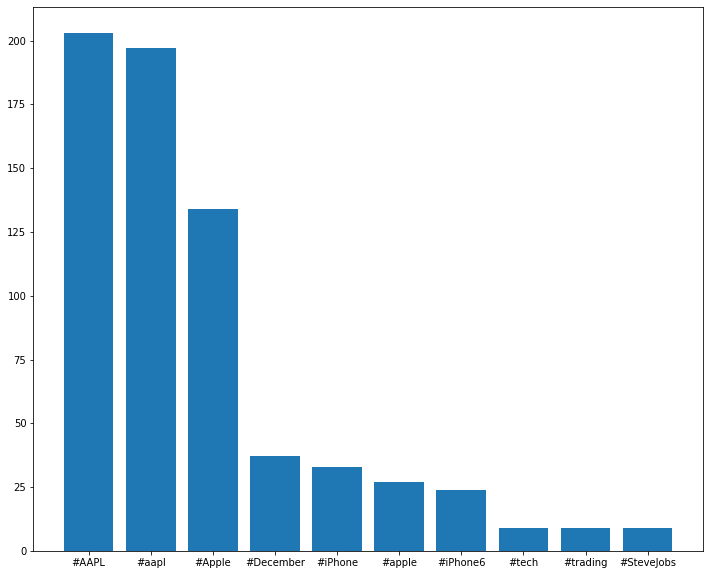

In [21]:
plt.figure(figsize=(12,10))
plt.bar(hashtag, freq)

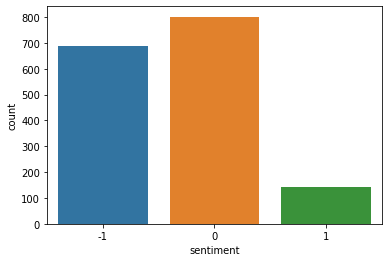

In [22]:
sns.countplot(data=df, x= 'sentiment')

In [23]:
pos_df = df[df['sentiment'] == 1]
neg_df = df[df['sentiment'] == -1]

In [24]:
text = " ".join(text.split()[1] for text in pos_df['text'])

word_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text)

(-0.5, 399.5, 199.5, -0.5)

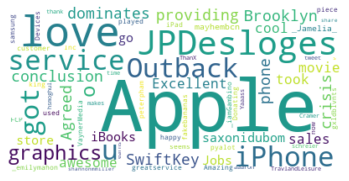

In [25]:
plt.imshow(word_cloud_pos, interpolation='bilinear')
plt.axis("off")

In [26]:
text = " ".join(text.split()[1] for text in neg_df['text'])

word_cloud_neg = WordCloud(collocations = False, background_color = 'white').generate(text)

(-0.5, 399.5, 199.5, -0.5)

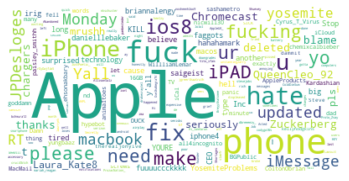

In [27]:
plt.imshow(word_cloud_neg, interpolation='bilinear')
plt.axis("off")

## 3. Data pre-processing

In [28]:
def remove_url(text):
    url_clean = re.compile(r"https?://\S+|www\.\S+")
    text=url_clean.sub(r'',text)
    return text

In [29]:
def remove_hashtags_tags(text):
    pattern = re.compile(r"(#\w+)")
    hashtags = pattern.sub(r"", text)
    
    pattern = re.compile(r"(@\w+)")
    tags = pattern.sub(r"", hashtags)
     
    return tags.strip()

In [30]:
def remove_emoji(text):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text=emoji_clean.sub(r'',text)
    return text

In [31]:
def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    
    return data

In [32]:
def remove_punc(data):
    punc_clean = re.compile(r"[.,:;_$?-]")
    data=punc_clean.sub(r'',data)
    return data

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
stop_words = set(stopwords.words('english'))
stop_words.remove('not')
def remove_stop_words(text):
    wordsList = nltk.word_tokenize(text)
    wordsList = [w for w in wordsList if not w in stop_words]
    return ' '.join(wordsList)

In [36]:
def stem(text):
    wordsList = nltk.word_tokenize(text)
    stemmed_words = []
    stemming = PorterStemmer()
    for i in wordsList:
        stemmed_words.append(stemming.stem(i))
    return ' '.join(stemmed_words)

In [37]:
def remove_digits(data):
    data.lower()
    digits_clean = re.compile(r"[0-9]")
    data=digits_clean.sub(r'',data)
    return data

In [42]:
cleaned_df = df.copy()

In [43]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [44]:
cleaned_df['text'] = cleaned_df['text'].apply(remove_url)
cleaned_df['text'] = cleaned_df['text'].apply(remove_hashtags_tags)
cleaned_df['text'] = cleaned_df['text'].apply(remove_emoji)
cleaned_df['text'] = cleaned_df['text'].apply(remove_punc)
cleaned_df['text'] = cleaned_df['text'].apply(remove_stop_words)
cleaned_df['text'] = cleaned_df['text'].apply(stem)
cleaned_df['text'] = cleaned_df['text'].apply(remove_digits)

In [45]:
cleaned_df.head()

,text,sentiment,hashtags
0,wow yall needa step rt music snapchat damn tim...,-1,[#Note4]
1,what happen to appl inc,0,"[#aapl, #apple]"
2,thank u i compil pic commun one place,1,[]
3,the oddli uplift stori appl cofound sold stake...,0,[#aapl]
4,exchang iphon differ color lmao chang mind,0,[]


In [46]:
df.head()

,text,sentiment,hashtags
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1,[#Note4]
1,What Happened To Apple Inc? http://t.co/FJEX...,0,"[#aapl, #apple]"
2,Thank u @apple I can now compile all of the pi...,1,[]
3,The oddly uplifting story of the Apple co-foun...,0,[#aapl]
4,@apple can i exchange my iphone for a differen...,0,[]


In [47]:
def output(out):
    if out == -1:
        return 0
    elif out == 0:
        return 1
    elif out == 1:
        return 2
    
# now the negativ will be 0, nutral is 1, positive is 2

cleaned_df['sentiment'] = cleaned_df['sentiment'].apply(output)

In [48]:
cleaned_df.head()

,text,sentiment,hashtags
0,wow yall needa step rt music snapchat damn tim...,0,[#Note4]
1,what happen to appl inc,1,"[#aapl, #apple]"
2,thank u i compil pic commun one place,2,[]
3,the oddli uplift stori appl cofound sold stake...,1,[#aapl]
4,exchang iphon differ color lmao chang mind,1,[]


## 4. Feature Extraction

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [50]:
x = cleaned_df['text']
y = cleaned_df['sentiment']

In [51]:
x_train,x_test, y_train, y_test = train_test_split(x, y , stratify=y, test_size=0.2, random_state=1)

In [52]:
tfidf = TfidfVectorizer()
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)

## 5. Building ML models

### 5.1 Machine learning models

In [53]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [54]:
def classification_report(model,x_test,y_test,model_name):
    y_pred = model.predict(x_test)
    
    print(f'----------- {model_name} -------------')
    print('accuracy_score:',accuracy_score(y_test,y_pred))
    print('Recall:',recall_score(y_test,y_pred, average='weighted'))
    print('precision_score:',precision_score(y_test,y_pred, average='weighted'))
    print('f1_score:',f1_score(y_test,y_pred, average='weighted'))
     
    fig , ax= plt.subplots()
    cm = confusion_matrix(y_test,y_pred)
    sns.set()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Blues')

In [55]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [56]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

RandomForestClassifier()

----------- Support Vector Machine -------------
accuracy_score: 0.8312883435582822
Recall: 0.8312883435582822
precision_score: 0.8450250429229138
f1_score: 0.814812484619892


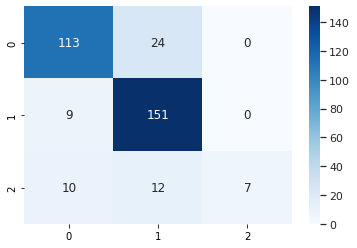

In [57]:
classification_report(svm, x_test, y_test, 'Support Vector Machine')

----------- Random Forest -------------
accuracy_score: 0.8006134969325154
Recall: 0.8006134969325154
precision_score: 0.8176956763124464
f1_score: 0.7930691712170695


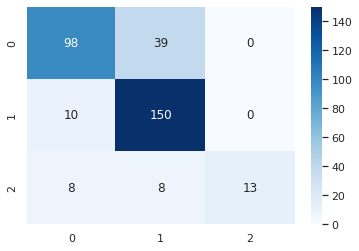

In [58]:
classification_report(random_forest, x_test, y_test, 'Random Forest')

## 5.2 Deep learning model

In [59]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Flatten, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [60]:
x = cleaned_df['text']
y = cleaned_df['sentiment']

In [61]:
x_train,x_test, y_train, y_test = train_test_split(x, y , stratify=y, test_size=0.2, random_state=1)

In [62]:
def calculate_length(x):
    return(len(x.split()))

cleaned_df['length'] = cleaned_df['text'].apply(calculate_length)
max_length = cleaned_df.length.max()
max_length

28

In [63]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_df['text'])
vocab_size = len(tokenizer.word_index)+1
vocab_size

2808

In [64]:
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

In [65]:
x_train_seq = pad_sequences(x_train_seq, maxlen=max_length)
x_test_seq = pad_sequences(x_test_seq, maxlen=max_length)

In [66]:
output_dim = 30

model = Sequential()
model.add(Embedding(vocab_size, output_dim=output_dim, input_length=max_length))
model.add(LSTM(128, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 30)            84240     
                                                                 
 lstm (LSTM)                 (None, 28, 128)           81408     
                                                                 
 batch_normalization (BatchN  (None, 28, 128)          512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 28, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                        

In [68]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [69]:
model.fit(x_train_seq, y_train, epochs=10, batch_size=16, shuffle=False)

Epoch 1/10
82/82 [==============================] - 11s 63ms/step - loss: 0.7755 - accuracy: 0.6641
Epoch 2/10
82/82 [==============================] - 6s 73ms/step - loss: 0.3593 - accuracy: 0.8620
Epoch 3/10
82/82 [==============================] - 4s 52ms/step - loss: 0.1366 - accuracy: 0.9563
Epoch 4/10
82/82 [==============================] - 4s 50ms/step - loss: 0.0613 - accuracy: 0.9824
Epoch 5/10
82/82 [==============================] - 5s 64ms/step - loss: 0.0357 - accuracy: 0.9954
Epoch 6/10
82/82 [==============================] - 4s 53ms/step - loss: 0.0274 - accuracy: 0.9946
Epoch 7/10
82/82 [==============================] - 4s 51ms/step - loss: 0.0324 - accuracy: 0.9923
Epoch 8/10
82/82 [==============================] - 5s 63ms/step - loss: 0.0229 - accuracy: 0.9939
Epoch 9/10
82/82 [==============================] - 4s 49ms/step - loss: 0.0258 - accuracy: 0.9946
Epoch 10/10
82/82 [==============================] - 4s 49ms/step - loss: 0.0164 - accuracy: 0.9962


In [70]:
def classification_report_deep_learning(model,x_test,y_test,model_name):
    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred, axis=1)
    
    print(f'----------- {model_name} -------------')
    print('accuracy_score:',accuracy_score(y_test,y_pred))
    print('Recall:',recall_score(y_test,y_pred, average='weighted'))
    print('precision_score:',precision_score(y_test,y_pred, average='weighted'))
    print('f1_score:',f1_score(y_test,y_pred, average='weighted'))
     
    fig , ax= plt.subplots()
    cm = confusion_matrix(y_test,y_pred)
    sns.set()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Blues')

11/11 [==============================] - 1s 21ms/step
----------- Long short term memory -------------
accuracy_score: 0.7760736196319018
Recall: 0.7760736196319018
precision_score: 0.7955517625434706
f1_score: 0.7827650454209393


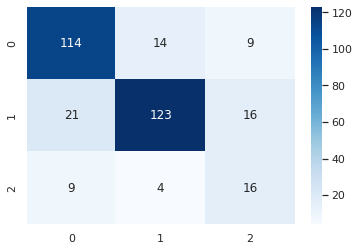

In [71]:
classification_report_deep_learning(model, x_test_seq, y_test, 'Long short term memory')